# Instructions


1. Given previous weather forcast data implement a model to predict whether or not it will rain tomorrow. 
2. <b>Evaluate your results. cross-validate your results using CV algorithm of your choice with 10 folds </b> 

## Beat the Baseline of 50% to pass the lab. Anything above 65% gets you a full score.

# About The Dataset


This dataset contains observations of weather metrics for each day from 2008 to 2017. The dataset includes the following fields:

| Field         | Description                                           | Unit            | Type   |
| ------------- | ----------------------------------------------------- | --------------- | ------ |
| Date          | Date of the Observation in YYYY-MM-DD                 | Date            | object |
| Location      | Location of the Observation                           | Location        | object |
| MinTemp       | Minimum temperature                                   | Celsius         | float  |
| MaxTemp       | Maximum temperature                                   | Celsius         | float  |
| Rainfall      | Amount of rainfall                                    | Millimeters     | float  |
| Evaporation   | Amount of evaporation                                 | Millimeters     | float  |
| Sunshine      | Amount of bright sunshine                             | hours           | float  |
| WindGustDir   | Direction of the strongest gust                       | Compass Points  | object |
| WindGustSpeed | Speed of the strongest gust                           | Kilometers/Hour | object |
| WindDir9am    | Wind direction averaged of 10 minutes prior to 9am    | Compass Points  | object |
| WindDir3pm    | Wind direction averaged of 10 minutes prior to 3pm    | Compass Points  | object |
| WindSpeed9am  | Wind speed averaged of 10 minutes prior to 9am        | Kilometers/Hour | float  |
| WindSpeed3pm  | Wind speed averaged of 10 minutes prior to 3pm        | Kilometers/Hour | float  |
| Humidity9am   | Humidity at 9am                                       | Percent         | float  |
| Humidity3pm   | Humidity at 3pm                                       | Percent         | float  |
| Pressure9am   | Atmospheric pressure reduced to mean sea level at 9am | Hectopascal     | float  |
| Pressure3pm   | Atmospheric pressure reduced to mean sea level at 3pm | Hectopascal     | float  |
| Cloud9am      | Fraction of the sky obscured by cloud at 9am          | Eights          | float  |
| Cloud3pm      | Fraction of the sky obscured by cloud at 3pm          | Eights          | float  |
| Temp9am       | Temperature at 9am                                    | Celsius         | float  |
| Temp3pm       | Temperature at 3pm                                    | Celsius         | float  |
| RainToday     | If there was rain today                               | Yes/No          | object |
| RISK_MM       | Amount of rain tomorrow                               | Millimeters     | float  |
| RainTomorrow  | If there is rain tomorrow                             | Yes/No          | float  |



In [2]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, log_loss, f1_score
import sklearn.metrics as metrics

### Importing the Dataset


In [4]:
df = pd.read_csv('Weather_Data.csv')

df.head(20)

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes
5,2/6/2008,20.2,27.2,1.6,2.6,8.6,W,41,W,ENE,...,69,62,1002.7,998.6,6,6,23.8,26.0,Yes,Yes
6,2/7/2008,18.6,26.3,6.2,5.2,5.2,W,41,W,S,...,75,80,999.0,1000.3,4,7,21.7,22.3,Yes,Yes
7,2/8/2008,17.2,22.3,27.6,5.8,2.1,W,41,S,SE,...,77,61,1008.3,1007.4,7,8,18.9,21.1,Yes,Yes
8,2/9/2008,16.4,20.8,12.6,4.8,3.0,W,41,SSW,W,...,92,91,1006.4,1007.6,7,7,17.1,16.5,Yes,Yes
9,2/10/2008,14.6,24.2,8.8,4.4,10.1,W,41,W,SSE,...,80,53,1014.0,1013.4,4,2,17.2,23.3,Yes,No


In [5]:
df.shape

(3271, 22)

<AxesSubplot:>

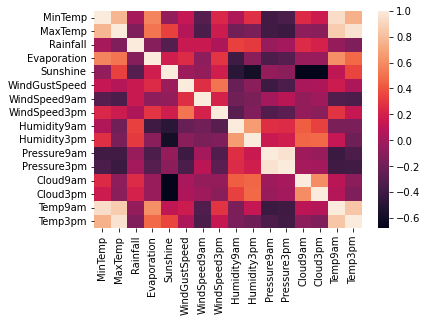

In [6]:
import seaborn as sns

correlation_matrix = df.corr().round(2)
# print(correlation_matrix)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=False)

### Data Preprocessing


#### Transforming Categorical Variables


First, we need to convert categorical variables to binary variables. We will use pandas `get_dummies()` method for this.


In [7]:
df_sydney_processed = pd.get_dummies(data=df, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

In [8]:
df_sydney_processed.RainToday_Yes

0       1
1       1
2       1
3       1
4       1
       ..
3266    0
3267    0
3268    0
3269    0
3270    0
Name: RainToday_Yes, Length: 3271, dtype: uint8

Next, we replace the values of the 'RainTomorrow' column changing them from a categorical column to a binary column. We do not use the `get_dummies` method because we would end up with two columns for 'RainTomorrow' and we do not want, since 'RainTomorrow' is our target.


In [9]:
df_sydney_processed.replace(['No', 'Yes'], [0,1], inplace=True)

Check for missing and duplicate values

In [10]:
df_sydney_processed.drop_duplicates(inplace=True)

In [11]:
df_sydney_processed.isna().sum()

Date              0
MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
                 ..
WindDir3pm_SSW    0
WindDir3pm_SW     0
WindDir3pm_W      0
WindDir3pm_WNW    0
WindDir3pm_WSW    0
Length: 68, dtype: int64

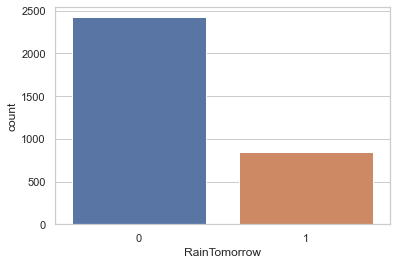

In [12]:
sns.set(style="whitegrid")
sns.countplot(df_sydney_processed.RainTomorrow)
plt.show()

<AxesSubplot:>

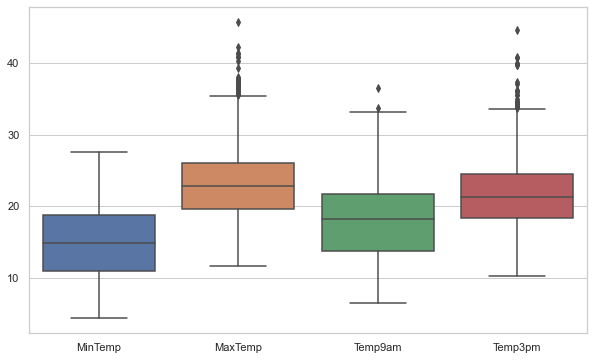

In [13]:
#check for outliers if need be using this code here
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_sydney_processed[['MinTemp','MaxTemp','Temp9am','Temp3pm']])

### Training Data and Test Data


Now, we set our 'features' or x values and our Y or target variable.


In [14]:
df_sydney_processed.drop('Date',axis=1,inplace=True)

In [15]:
df_sydney_processed = df_sydney_processed.astype(float)

In [16]:
features = df_sydney_processed.drop(columns='RainTomorrow', axis=1)


In [17]:
y = df_sydney_processed['RainTomorrow']
y

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
3266    0.0
3267    0.0
3268    0.0
3269    0.0
3270    0.0
Name: RainTomorrow, Length: 3271, dtype: float64

#### Q1) Using `train_test_split` function to split the `features` and `Y` dataframes with a `test_size` of `0.2` and the `random_state` set to `10`.


In [19]:
x_train, x_test, y_train, y_test =  train_test_split(features, y, test_size=0.2, random_state=4,stratify = y)

#### Create and train your model using the training data (`x_train`, `y_train`).


In [23]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(class_weight = "balanced", max_depth=1)

In [24]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=1)

[Text(0.5, 0.75, 'X[4] <= 6.65\ngini = 0.5\nsamples = 2616\nvalue = [1308.0, 1308.0]'),
 Text(0.25, 0.25, 'gini = 0.36\nsamples = 971\nvalue = [306.573, 995.929]'),
 Text(0.75, 0.25, 'gini = 0.362\nsamples = 1645\nvalue = [1001.427, 312.071]')]

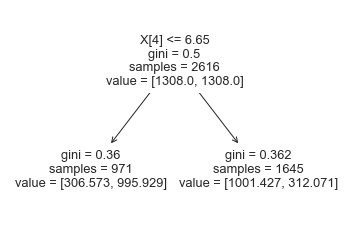

In [25]:
tree.plot_tree(clf)

In [26]:
y_pred = clf.predict(x_test)

#### Use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.


In [31]:
from sklearn.metrics import f1_score,accuracy_score


acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test, y_pred, average = None)
f1_weighted = f1_score(y_test, y_pred, average = 'weighted')

print("Accuracy: ",acc )
print("F1-Score: ", f1)
print("F1-Score-Weighted: ", f1_weighted)

Accuracy:  0.7221374045801526
F1-Score:  [0.79223744 0.58064516]
F1-Score-Weighted:  0.737320362193445


#### Using the `predictions` and the `y_test` dataframe Evaluate your model and cross validate your results

In [41]:
from sklearn.model_selection import cross_val_score

k_F = cross_val_score(clf,  features, y,scoring = 'f1_weighted', cv=10)

In [42]:
scores = cross_val_score(clf, features, y, scoring = 'f1_weighted', cv=10)
scores.mean()

0.7205571299074431

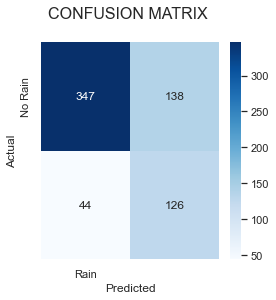

In [96]:
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(4,4))

sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels= ['Rain'] ,
            yticklabels=['No Rain'])

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX \n", size=16);


## Check under and overfitting

In [35]:
from sklearn.metrics import f1_score,accuracy_score

acc_test = accuracy_score(y_test,y_pred)
f1_test = f1_score(y_test, y_pred,average = None)
f1_test_weighted = f1_score(y_test, y_pred, average = 'weighted')



y_T_pred  = clf.predict(x_train)

acc_train = accuracy_score(y_train,y_T_pred)
f1_train = f1_score(y_train, y_T_pred,average = None)
f1_train_weighted = f1_score(y_train, y_T_pred, average = 'weighted')



print("Training score")
print("Accuracy: ",acc_train )
print("F1-Score: ", f1_train)
print("F1-Score-Weighted: ", f1_train_weighted)

print("Testing score")
print("Accuracy: ", acc_test )
print("F1-Score: ", f1_test)
print("F1-Score-Weighted: ", f1_test_weighted)

Training score
Accuracy:  0.764525993883792
F1-Score:  [0.82802903 0.62666667]
F1-Score-Weighted:  0.7757641076602858
Testing score
Accuracy:  0.7221374045801526
F1-Score:  [0.79223744 0.58064516]
F1-Score-Weighted:  0.737320362193445


#### Discuss your findings 

As this is data is binary classification and the data looked as it depends on sequences of features thats why I used decision tree.

If the depth of tree was increased more that 2 the overfitting would increase and at 2 it still gives 4% overfitting as the weighted f1 scores are 0.737 for testing and 0.776 for training.

Desicion tree does not depends on multicolinearity even when I used it it degraded the model performance.

Using cross validation for finding generalized result. The result I got was 0.72 which well passes the 65% accuracy case.
